### Feature Description
<table>
<tr><th>Feature Name</th><th>Definition</th></tr>
<tr><td>Pregnencies</td><td> Number of times pregnent </td></tr>
<tr><td>Glucose</td> <td>Plasma glucose concentration a 2 hours in an oral 
glucose tolerance test</td></tr>
<tr><td>Blood Pressure </td><td>Diastolic blood pressure (mm Hg)</td></tr>
<tr><td>Skin Thickness </td><td>Triceps skin fold thickness (mm) </td></tr>
<tr><td>Insulin </td><td>2-Hour serum insulin (mu U/ml)</td></tr>
<tr><td>BMI </td><td>Body Mass Index</td></tr>
<tr><td>DiabetesPedigreeFunction </td><td>Values Computed based on Diabetes pedigree function</td></tr>
<tr><td>Age </td><td>Age (years)</td></tr>
<tr><td>Outcome</td><td>0 or 1</td></tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('./Datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [4]:
df.shape

(768, 9)

In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [7]:
# Glucose, BloodPressure, SkinThickness, Insulin and BMI 

In [8]:
glu0 = df[df['Glucose']==0].shape
bp0 = df[df['BloodPressure']==0].shape
st0 = df[df['SkinThickness']==0].shape
in0 = df[df['Insulin']==0].shape
bmi0 = df[df['BMI']==0].shape
print('Glu0',glu0)
print('BP0',bp0)
print('st0',st0)
print('in0',in0)
print('BMI0',bmi0)

Glu0 (5, 9)
BP0 (35, 9)
st0 (227, 9)
in0 (374, 9)
BMI0 (11, 9)


In [9]:
glu_mean = df['Glucose'].mean() 
bp_mean = df['BloodPressure'].mean()
st_mean = df['SkinThickness'].mean()
in_mean = df['Insulin'].mean()
bmi_mean = df['BMI'].mean()
print(glu_mean,bp_mean,st_mean,in_mean,bmi_mean)

120.89453125 69.10546875 20.536458333333332 79.79947916666667 31.992578124999977


In [10]:
df['Glucose'].replace(0,glu_mean,inplace=True)
df['BloodPressure'].replace(0,bp_mean,inplace=True)
df['SkinThickness'].replace(0,st_mean,inplace=True)
df['Insulin'].replace(0,in_mean,inplace=True)
df['BMI'].replace(0,bmi_mean,inplace=True)

In [11]:
glu0 = df[df['Glucose']==0].shape
bp0 = df[df['BloodPressure']==0].shape
st0 = df[df['SkinThickness']==0].shape
in0 = df[df['Insulin']==0].shape
bmi0 = df[df['BMI']==0].shape
print('Glu0',glu0)
print('BP0',bp0)
print('st0',st0)
print('in0',in0)
print('BMI0',bmi0)

Glu0 (0, 9)
BP0 (0, 9)
st0 (0, 9)
in0 (0, 9)
BMI0 (0, 9)


In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x.shape)
print(y.shape)

(768, 8)
(768,)


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(576, 8)
(192, 8)
(576,)
(192,)


In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf1 = RandomForestClassifier(n_estimators=20) # criterion='gini'
rf1.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [17]:
print('Training accuracy',rf1.score(x_train,y_train))
print('Testing accuracy',rf1.score(x_test,y_test))

Training accuracy 0.9947916666666666
Testing accuracy 0.7552083333333334


In [18]:
y_pred_rf1 = rf1.predict(x_test)
# y_pred_rf1

In [19]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [20]:
cm = confusion_matrix(y_test,y_pred_rf1)
print(cm)

[[105  21]
 [ 26  40]]


In [21]:
print(accuracy_score(y_test,y_pred_rf1))

0.7552083333333334


In [22]:
print(classification_report(y_test,y_pred_rf1))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       126
           1       0.66      0.61      0.63        66

    accuracy                           0.76       192
   macro avg       0.73      0.72      0.72       192
weighted avg       0.75      0.76      0.75       192



In [23]:
from sklearn.model_selection import cross_val_score

In [24]:
# max_depth=[3,4,5,6,7,8,9]
# for i in max_depth:
scores = cross_val_score(RandomForestClassifier(),x,y)
print(scores)
print(f'{scores.mean()}')

[0.76623377 0.72727273 0.74025974 0.84313725 0.73856209]
0.7630931160342925


### CV with max_depth

In [25]:
max_depth=[3,4,5,6,7,8,9]
for i in max_depth:
    scores = cross_val_score(RandomForestClassifier(max_depth=i),x,y)
    print(f'At max_depth {i} the {scores.mean()}')

At max_depth 3 the 0.7578643578643579
At max_depth 4 the 0.7552754435107376
At max_depth 5 the 0.7630761395467278
At max_depth 6 the 0.7669807316866141
At max_depth 7 the 0.7656820303879128
At max_depth 8 the 0.7682879212290977
At max_depth 9 the 0.7513453866395043


### CV with criterion

In [26]:
c=['gini','entropy']
for i in c:
    scores = cross_val_score(RandomForestClassifier(criterion=i),x,y)
    print(f'At criterion {i} the {scores.mean()}')

At criterion gini the 0.7617859264918089
At criterion entropy the 0.7591800356506239


### CV for min_samples_split

In [27]:
mss =[3,4,5,6,7,8,9,11,13,24,25,100]
for i in mss:
    scores = cross_val_score(RandomForestClassifier(min_samples_split=i),x,y)
    print(f'At min_samples_split {i} the {scores.mean()}')

At min_samples_split 3 the 0.7630846277905101
At min_samples_split 4 the 0.7604362957304135
At min_samples_split 5 the 0.7787369493251847
At min_samples_split 6 the 0.7617859264918089
At min_samples_split 7 the 0.7631016042780748
At min_samples_split 8 the 0.7683133859604447
At min_samples_split 9 the 0.7656480774127832
At min_samples_split 11 the 0.7643578643578645
At min_samples_split 13 the 0.7644172820643409
At min_samples_split 24 the 0.7696205755029284
At min_samples_split 25 the 0.75528393175452
At min_samples_split 100 the 0.7617519735166793


In [28]:
bs =[True,False]
for i in bs:
    scores = cross_val_score(RandomForestClassifier(bootstrap=i),x,y)
    print(f'At bootstrap {i} the {scores.mean()}')

At bootstrap True the 0.7605126899244545
At bootstrap False the 0.7565486800780918


In [29]:
ns =[20,40,50,80,100,120,140,160,180,200]
for i in ns:
    scores = cross_val_score(RandomForestClassifier(n_estimators=i),x,y)
    print(f'At N_estimators {i} the {scores.mean()}')

At N_estimators 20 the 0.7513284101519395
At N_estimators 40 the 0.7552414905356082
At N_estimators 50 the 0.7617349970291146
At N_estimators 80 the 0.7617689500042442
At N_estimators 100 the 0.763059163059163
At N_estimators 120 the 0.7539937186996011
At N_estimators 140 the 0.75528393175452
At N_estimators 160 the 0.764349376114082
At N_estimators 180 the 0.7578983108394873
At N_estimators 200 the 0.7734827264239029


In [30]:
rf2 = RandomForestClassifier(criterion='gini',
                             max_depth=8,min_samples_split=3)
rf2.fit(x_train,y_train)

RandomForestClassifier(max_depth=8, min_samples_split=3)

In [31]:
print('Training accuracy',rf2.score(x_train,y_train))
print('Testing accuracy',rf2.score(x_test,y_test))

Training accuracy 0.9444444444444444
Testing accuracy 0.796875


In [32]:
y_pred_rf2 = rf2.predict(x_test)
# y_pred_rf1

In [33]:
cm = confusion_matrix(y_test,y_pred_rf2)
print(cm)

[[106  20]
 [ 19  47]]


In [34]:
print(classification_report(y_test,y_pred_rf2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84       126
           1       0.70      0.71      0.71        66

    accuracy                           0.80       192
   macro avg       0.77      0.78      0.78       192
weighted avg       0.80      0.80      0.80       192



In [35]:
from sklearn import tree

In [36]:
fn = x.columns
cn = ['0','1']
print(fn)
print(cn)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
['0', '1']


In [37]:
rf2.estimators_[4]

DecisionTreeClassifier(max_depth=8, max_features='auto', min_samples_split=3,
                       random_state=660276223)

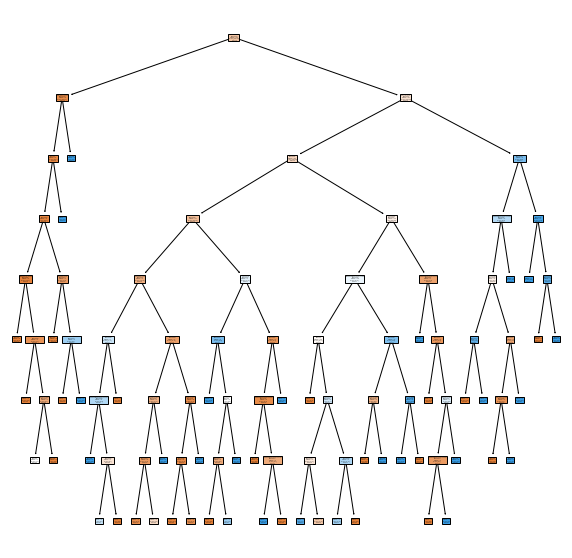

In [38]:
plt.figure(figsize=(10,10))
tree.plot_tree(rf2.estimators_[4],feature_names=fn,class_names=cn,filled=True)
plt.show()